# Lezione 2.2: Gradient Descent - Come Fa un Modello a Imparare? 🏔️

Nelle lezioni precedenti, abbiamo detto che l'algoritmo di regressione lineare "trova la retta migliore" minimizzando l'errore. Ma come fa, in pratica? Prova tutte le infinite rette possibili? Sarebbe troppo lento.

La risposta è un processo intelligente e iterativo chiamato **Gradient Descent (Discesa del Gradiente)**.

### L'Analogia: L'Escursionista nella Valle Nebbiosa

Immagina di essere un escursionista su una montagna, immerso in una nebbia fittissima. Il tuo obiettivo è raggiungere il punto più basso della valle, ma puoi vedere solo il terreno a un metro da te. Come fai?



Probabilmente faresti così:
1.  **Senti la pendenza** del terreno sotto i tuoi piedi.
2.  Individui la direzione della **discesa più ripida**.
3.  Fai un **piccolo passo** in quella direzione.
4.  **Ripeti** il processo: senti di nuovo la pendenza, fai un altro passo, e così via, finché non arrivi in un punto pianeggiante, che è il fondo della valle.

Ecco, il Gradient Descent fa **esattamente la stessa cosa**.

* **La valle** è la nostra "funzione di costo" (l'errore totale).
* **La tua posizione** rappresenta i valori attuali dei parametri del modello (`m` e `q`).
* **L'altitudine** è l'errore: più sei in alto, più l'errore è grande.
* **"Sentire la pendenza"** è calcolare una cosa chiamata **gradiente**.
* **"Fare un passo"** è aggiornare i parametri del modello per ridurre l'errore.

Per capire l'algoritmo, dobbiamo conoscere tre elementi:

### 1. La Funzione di Costo (La Mappa della Valle)
È una funzione matematica che misura "quanto sta sbagliando" il nostro modello con i parametri attuali. Per la regressione lineare, questa funzione è come una **conca liscia (un paraboloide)**. Il nostro obiettivo è trovare il punto più basso di questa conca.

### 2. Il Gradiente (La Direzione della Pendenza)
Senza entrare in dettagli matematici complessi (derivate), il **gradiente** è un vettore che ci dice qual è la direzione della **massima pendenza in salita**.
Se noi prendiamo la **direzione opposta (-gradiente)**, otteniamo la direzione di massima discesa. È la bussola che dice al nostro escursionista dove fare il prossimo passo per scendere più velocemente.

### 3. Il Learning Rate (La Lunghezza del Passo)
Il **Learning Rate** (tasso di apprendimento) è un numero che controlla la **dimensione del passo** che facciamo. È un parametro fondamentale:
* **Learning Rate troppo piccolo**: Facciamo passi minuscoli. Raggiungeremo il fondo, ma ci vorrà un'eternità.
* **Learning Rate troppo grande**: Facciamo un passo così lungo che "saltiamo" dall'altra parte della valle, magari finendo più in alto di prima! Il modello non riesce a trovare il fondo.
* **Learning Rate giusto**: Scendiamo in modo efficiente e veloce.

L'algoritmo è partito da x=-8.0 ed è arrivato a x=-0.0302


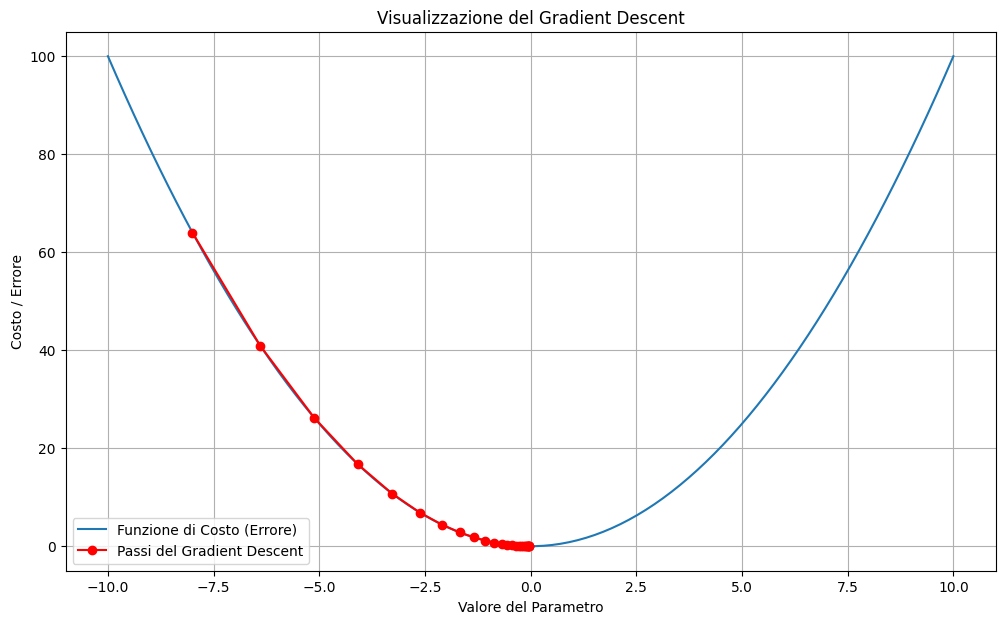

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. LA FUNZIONE DI COSTO (La nostra "valle" semplificata)
# Immaginiamo che l'errore sia descritto da una semplice parabola. Vogliamo trovare il punto più basso (x=0).
def funzione_di_costo(x):
    return x**2

# 2. IL GRADIENTE (La "pendenza" della nostra valle)
# Dalla matematica, sappiamo che la pendenza (derivata) di x^2 è 2*x.
# Questa formula ci dice la pendenza in qualsiasi punto x.
def gradiente(x):
    return 2 * x

# 3. PARAMETRI DELL'ALGORITMO
learning_rate = 0.1  # La lunghezza del nostro passo. Prova a cambiarlo a 0.01 o 0.9!
n_iterazioni = 25    # Quanti passi facciamo.
punto_di_partenza = -8.0 # La posizione iniziale del nostro "escursionista".

# Teniamo traccia di tutti i passi per poterli disegnare
storico_punti = [punto_di_partenza]
punto_corrente = punto_di_partenza

# 4. IL CICLO DI APPRENDIMENTO (La "camminata" dell'escursionista)
for i in range(n_iterazioni):
    # Calcola la pendenza nel punto attuale
    pendenza = gradiente(punto_corrente)

    # Fai un passo nella direzione opposta alla pendenza
    # La dimensione del passo è proporzionale alla pendenza e al learning rate
    passo = pendenza * learning_rate
    punto_corrente = punto_corrente - passo

    # Salva la nuova posizione
    storico_punti.append(punto_corrente)

print(f"L'algoritmo è partito da x={punto_di_partenza} ed è arrivato a x={punto_corrente:.4f}")

# 5. VISUALIZZAZIONE
# Disegniamo la valle (la parabola)
x_valle = np.linspace(-10, 10, 100)
y_valle = funzione_di_costo(x_valle)

plt.figure(figsize=(12, 7))
plt.plot(x_valle, y_valle, label='Funzione di Costo (Errore)')
# Disegniamo i passi fatti dal nostro algoritmo
storico_punti = np.array(storico_punti)
plt.plot(storico_punti, funzione_di_costo(storico_punti), 'o-', color='red', label='Passi del Gradient Descent')

plt.title('Visualizzazione del Gradient Descent')
plt.xlabel('Valore del Parametro')
plt.ylabel('Costo / Errore')
plt.legend()
plt.grid(True)
plt.show()

Come vedi dal grafico, l'algoritmo è partito da un punto casuale (-8.0) e, passo dopo passo, si è avvicinato sempre di più al fondo della valle (il punto di errore minimo a x=0). I primi passi sono grandi perché la pendenza è alta, mentre gli ultimi sono molto piccoli perché il terreno diventa più pianeggiante.

### Riepilogo

* Il **Gradient Descent** non è un modello, ma un **algoritmo di ottimizzazione** che i modelli usano per imparare.
* Il suo scopo è trovare i parametri di un modello che **minimizzano una funzione di costo** (l'errore).
* Funziona in modo **iterativo**: calcola la pendenza (gradiente) e fa un piccolo passo nella direzione di discesa più ripida.
* Il **Learning Rate** è un parametro cruciale che determina la dimensione di questi passi.

Questo processo è il motore che alimenta non solo la regressione lineare, ma quasi tutti i modelli di machine learning più complessi, incluse le reti neurali.

# Il Problema dei Minimi Locali 🏞️

La nostra analogia dell'escursionista nella valle è perfetta, ma abbiamo immaginato una valle semplice, a forma di conca. Cosa succede se il paesaggio è più complesso?



In un paesaggio del genere, incontriamo due tipi di "fondo valle":

* **Minimo Locale**: È il punto più basso di una piccola valle, ma **non** il punto più basso di tutto il paesaggio. Se il nostro escursionista finisce qui, si ferma. Il terreno intorno a lui è piatto o in salita, quindi crede di essere arrivato.
* **Minimo Globale**: È il punto **assolutamente più basso** di tutto il paesaggio. È la soluzione ottimale che stiamo cercando.

**Il Rischio del Gradient Descent "Ingenuo"**
L'algoritmo del Gradient Descent è "ingordo" (greedy): a ogni passo, sceglie la discesa più ripida che vede *in quel momento*. Se per caso parte da un punto che lo conduce in una valle poco profonda (un minimo locale), **rimarrà intrappolato lì**. Il gradiente diventerà zero e l'algoritmo si fermerà, convinto di aver trovato la soluzione migliore, ignaro che magari, superata una collina, c'è una valle molto più profonda.

Vediamo questo comportamento in azione.

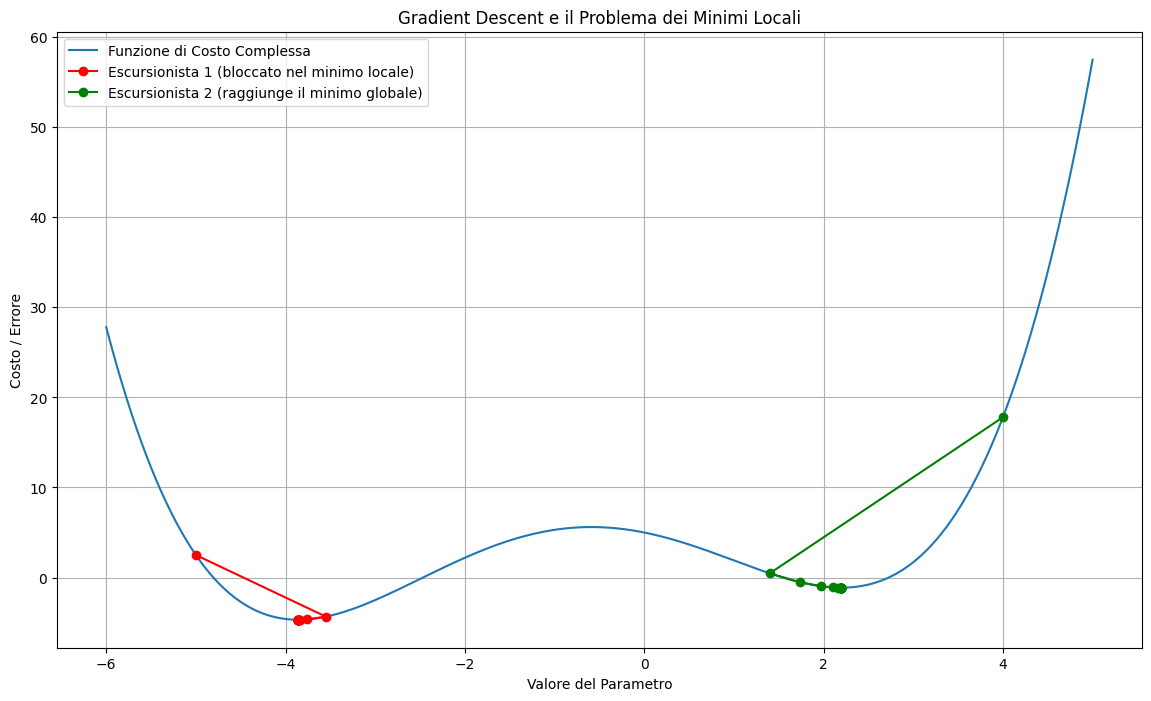

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. UNA FUNZIONE DI COSTO COMPLESSA (Il nostro "paesaggio montuoso")
# Questa funzione ha diverse "valli" (minimi locali e uno globale)
def funzione_costo_complessa(x):
    return 0.1*x**4 + 0.3*x**3 - 1.5*x**2 - 2*x + 5

# Il suo gradiente (la pendenza), calcolato matematicamente
def gradiente_complesso(x):
    return 0.4*x**3 + 0.9*x**2 - 3*x - 2

# 2. ESEGUIAMO DUE SIMULAZIONI CON PUNTI DI PARTENZA DIVERSI
learning_rate = 0.1
n_iterazioni = 30

# Escursionista 1: Parte da sinistra
start_point_1 = -5.0
path_1 = [start_point_1]
current_point_1 = start_point_1
for _ in range(n_iterazioni):
    gradient = gradiente_complesso(current_point_1)
    current_point_1 -= learning_rate * gradient
    path_1.append(current_point_1)

# Escursionista 2: Parte da destra
start_point_2 = 4.0
path_2 = [start_point_2]
current_point_2 = start_point_2
for _ in range(n_iterazioni):
    gradient = gradiente_complesso(current_point_2)
    current_point_2 -= learning_rate * gradient
    path_2.append(current_point_2)

# 3. VISUALIZZAZIONE
x_landscape = np.linspace(-6, 5, 400)
y_landscape = funzione_costo_complessa(x_landscape)

plt.figure(figsize=(14, 8))
plt.plot(x_landscape, y_landscape, label='Funzione di Costo Complessa')

# Plotta il percorso del primo escursionista
path_1 = np.array(path_1)
plt.plot(path_1, funzione_costo_complessa(path_1), 'o-', color='red', label='Escursionista 1 (bloccato nel minimo locale)')

# Plotta il percorso del secondo escursionista
path_2 = np.array(path_2)
plt.plot(path_2, funzione_costo_complessa(path_2), 'o-', color='green', label='Escursionista 2 (raggiunge il minimo globale)')

plt.title('Gradient Descent e il Problema dei Minimi Locali')
plt.xlabel('Valore del Parametro')
plt.ylabel('Costo / Errore')
plt.legend()
plt.grid(True)
plt.show()

Il grafico mostra chiaramente il problema:
* L'**Escursionista 1** (rosso), partendo da sinistra, scende nella prima valle che incontra e si ferma. Ha trovato un **minimo locale**.
* L'**Escursionista 2** (verde), partendo da un punto diverso, ha la fortuna di scendere nella valle più profonda, raggiungendo il **minimo globale**.

La soluzione trovata dipende criticamente dal punto di partenza!

### Strategie per non Rimanere Intrappolati

Fortunatamente, la comunità del machine learning ha sviluppato tecniche più avanzate per affrontare questo problema. L'idea generale è quella di introdurre una qualche forma di "casualità" o "inerzia" per aiutare l'escursionista a "scavalcare" le colline e uscire dalle valli poco profonde. Alcune di queste tecniche sono:

* **Gradient Descent Stocastico (SGD)**: Invece di calcolare la pendenza su tutti i dati (una visione chiara della pendenza), la calcola su un piccolo campione casuale. Il percorso diventa più "rumoroso" e "traballante", e questo rumore può bastare a "sbalzarlo" fuori da un minimo locale.
* **Momentum**: Si aggiunge una sorta di "inerzia" al nostro escursionista. Se sta scendendo velocemente, accumula "momento" che lo può aiutare a superare una piccola salita successiva, invece di fermarsi subito.
* **Algoritmi Adattivi (es. Adam, RMSprop)**: Sono ottimizzatori più moderni che modificano il learning rate in modo intelligente durante la discesa, rendendo il processo più robusto.
* **Inizializzazione Casuale Multipla**: Si fa partire l'algoritmo più volte da punti iniziali diversi e alla fine si sceglie la soluzione migliore trovata. L'esperimento che abbiamo appena fatto nel codice è un esempio di questo approccio.